In [246]:
import pickle
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


class ResultManager:
    """
    Settings:
    -   Compression Ratio
    -   Noise Level
    -   Distortion Coefficient
    -   Number of users
    The dicts should including
    Key:
    -   Transmission Time
    -   Power
    -   Transforming factor
    -   Number of channels
    """
    def __init__(self,
                 data_path):
        init_data = {
            'Compression Ratio': [],
            'Noise Level': [],
            'Distortion': [],
            'Number of Users': [],
            'Transmission Time': [],
            'Power': [],
            'Transforming Factor': [],
            'Number of Channels': []
        }
        self.colorset = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
                        '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
        self.result_df = pd.DataFrame(init_data)
        self.data_path = data_path
        if os.path.exists(self.data_path):
            pass
        else:
            self.df2pickle()

    def update_setting_value(self,
                             compression=None,
                             noise_lvl=None,
                             distortion_coeff=None,
                             user_num=None,
                             transmission_time=None,
                             power=None,
                             transforming_factor=None,
                             num_channels=None):
        new_data = {
            'Compression Ratio': [compression],
            'Noise Level': [noise_lvl],
            'Distortion': [distortion_coeff],
            'Number of Users': [user_num],
            'Transmission Time': [transmission_time],
            'Power': [power],
            'Transforming Factor': [transforming_factor],
            'Number of Channels': [num_channels]
        }
        new_df = pd.DataFrame(new_data)
        load_df = self.pickle2df()
        self.result_df = pd.concat([load_df, new_df], ignore_index=True)
        self.df2pickle()

    def query2draw(self, key_name, key_list, key_draw_x, key_draw_y):
        result_df = self.pickle2df()
        sns.set_style("whitegrid")  # Turn on the grid
        sns.lineplot(
            x=key_draw_x,
            y=key_draw_y,
            data=result_df,
            hue=key_name,
            linewidth=1.5,
            linestyle='dashed',
            palette=self.colorset
            )
        sns.scatterplot(x=key_draw_x,
                        y=key_draw_y,
                        hue=key_name,
                        data=result_df,
                        style=key_name,
                        palette=self.colorset,
                        legend=False)

        values = result_df[key_name].unique()
        legend_labels = [f'o={value}' for value in values]
        print(legend_labels)
        plt.legend(labels=legend_labels,
                   loc='upper left',
                   ncol=2,
                   title=key_name)
        plt.savefig('plot.pdf', dpi=300)  # Save as PDF


    def df2pickle(self):
        with open(self.data_path, 'wb') as file:
            pickle.dump(self.result_df, file)

    def pickle2df(self):
        with open(self.data_path, 'rb') as file:
            target_df = pickle.load(file)
        return target_df

    def get_value(self):
        return self.result_df


df_manager = ResultManager(data_path = "tamca.pkl")


In [ ]:
cnt = 0

In [ ]:
for idx in range(10):
    df_manager.update_setting_value(
        compression         = cnt,
        noise_lvl           = (idx+1)*2,
        distortion_coeff    = (idx+1)*3,
        user_num            = (idx+1)*(4+idx),
        transmission_time   = ((idx+1)*5)*(cnt+1)/2,
        power               = (idx+1)*6,
        transforming_factor = (idx+1)*7,
        num_channels        = (idx+1)*8
    )
cnt += 1
read_df = df_manager.pickle2df()
print(read_df)

<ipython-input-246-855e697d283c>:70: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.lineplot(
<ipython-input-246-855e697d283c>:79: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.scatterplot(x=key_draw_x,


['o=0.0', 'o=1.0', 'o=2.0', 'o=3.0', 'o=4.0']


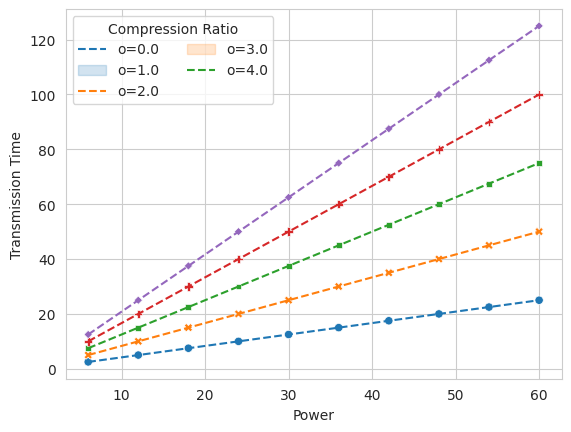

In [247]:
df_manager.query2draw(
    key_name="Compression Ratio",
    key_list=[1,2,3,4],
    key_draw_x="Power",
    key_draw_y="Transmission Time"
)